In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns

### Download the data

In [3]:
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

with open("owid-covid-data.csv", "wb") as f:
  f.write(requests.get(url).content)

In [2]:
df = pd.read_csv("owid-covid-data.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355616,ZWE,Africa,Zimbabwe,2023-11-05,265848.0,0.0,0.0,5723.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
355617,ZWE,Africa,Zimbabwe,2023-11-06,265848.0,0.0,0.0,5723.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
355618,ZWE,Africa,Zimbabwe,2023-11-07,265848.0,0.0,0.0,5723.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
355619,ZWE,Africa,Zimbabwe,2023-11-08,265848.0,0.0,0.0,5723.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


### Clean the data

Taking only necessary columns for visualization.

In [3]:
df_cleaned = df[['continent', 'location', 'total_cases', 'total_deaths', 'total_vaccinations', 'population_density', 'gdp_per_capita']]

Concentrating the total dataset into smaller dataframe by grouping and aggregating parameters by country name.

In [4]:
continent_list = df_cleaned['continent'].unique().tolist()
location_list = df_cleaned['location'].unique()

df_cleaned = df_cleaned.groupby('location').agg({'total_cases': 'sum', 'total_deaths': 'sum', 'total_vaccinations': 'sum', 'population_density': 'mean', 'gdp_per_capita': 'mean'})


Dropping the rows with values of continent and world, and also with zero or `nan` values in cleaned dataframe.

In [5]:
continent_list.append('World')

for i in df_cleaned.index:
  if i in continent_list:
    df_cleaned.drop(i, inplace=True)

In [6]:
df_cleaned = df_cleaned.replace(0, np.nan)
df_cleaned = df_cleaned.dropna()

### Data Visualization and Analysis

Covid pandemic should have caused more deaths in those areas where the population density is high as it is a highly sensitive contagious viral disease. To analyze the relation between total deaths of each country vs their population density by using scatter plot. It turns out the result is totally opposite. Countries having low population density has relatively higher deaths.

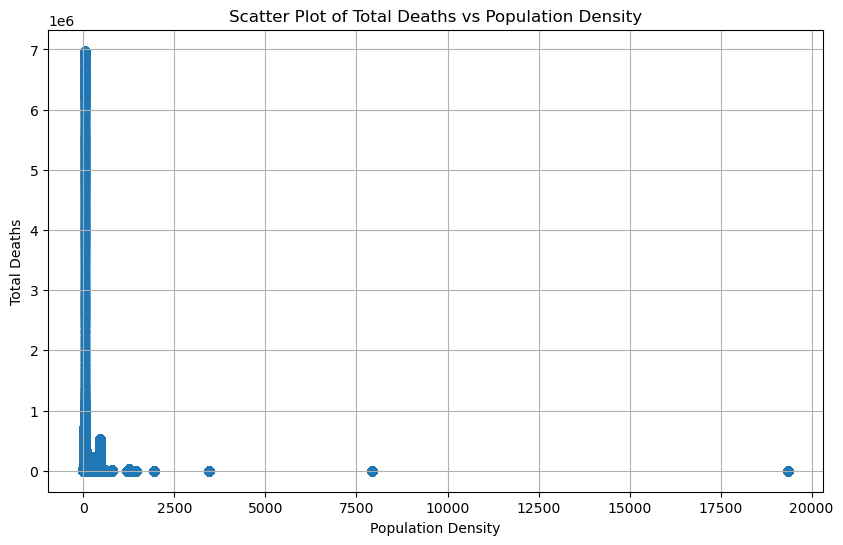

In [7]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['population_density'], df['total_deaths'], alpha=0.7)
plt.title('Scatter Plot of Total Deaths vs Population Density')
plt.xlabel('Population Density')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.show()

Plotting a heatmap in order to analyze the correlations between each of the columns of the cleaned dataset. Surprisingly, population_density doesn't have much effect neither on total deaths nor total cases. And also it doesn't affect the GDP of the country. Moreover, total cases has a lot of effect over total deaths as expected.

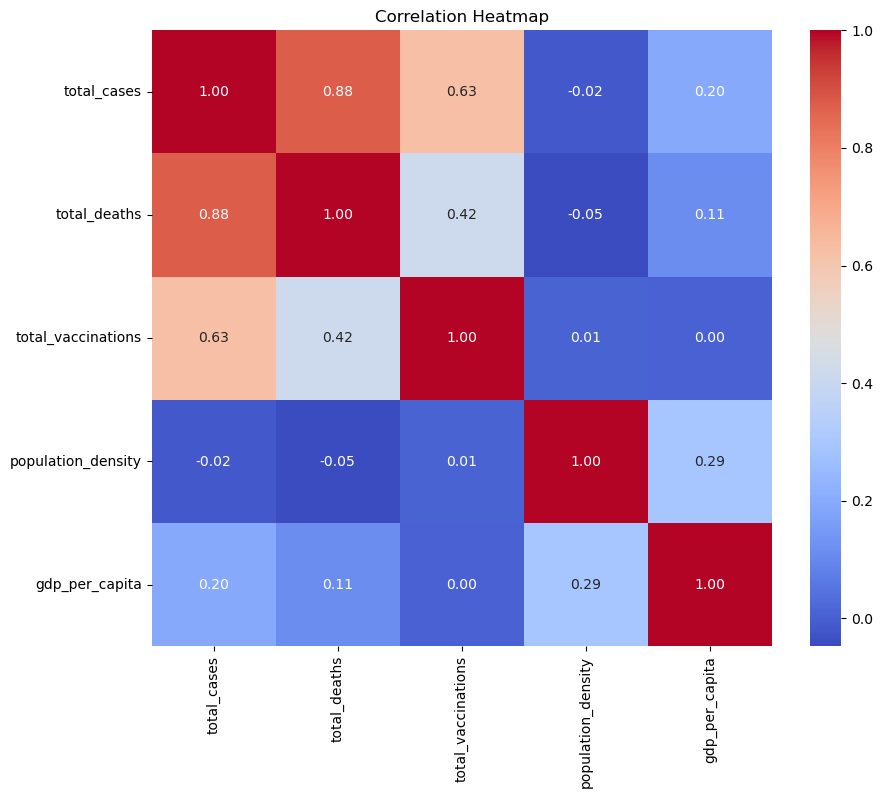

In [8]:
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

A boxplot is used to analyze the total deaths per country. According to the plot, most of the countries have a total number of deaths between 100 million.

<AxesSubplot:xlabel='total_deaths'>

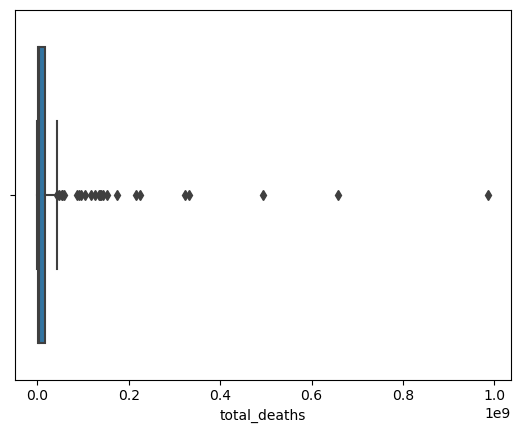

In [28]:
sns.boxplot(x=df_cleaned['total_deaths'])

A violin plot is used to analyze the total cases per country. According to the plot, most of the countries have a total number of deaths between 10 million to 150 million.

<AxesSubplot:xlabel='total_cases'>

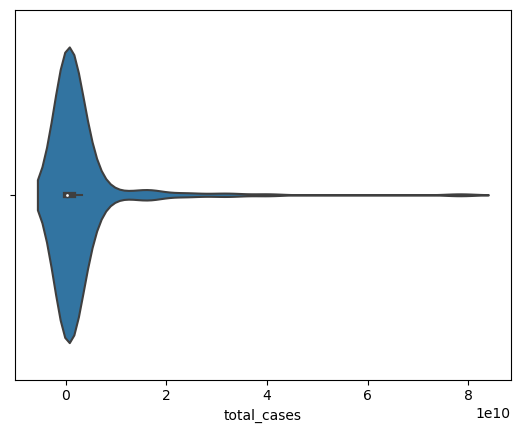

In [16]:
sns.violinplot(x=df_cleaned["total_cases"])

A scatter plot is used to analyze the effect of population density over GDP. It seems that countries with low population density has relatively higher GDP than the countries with higher population density.

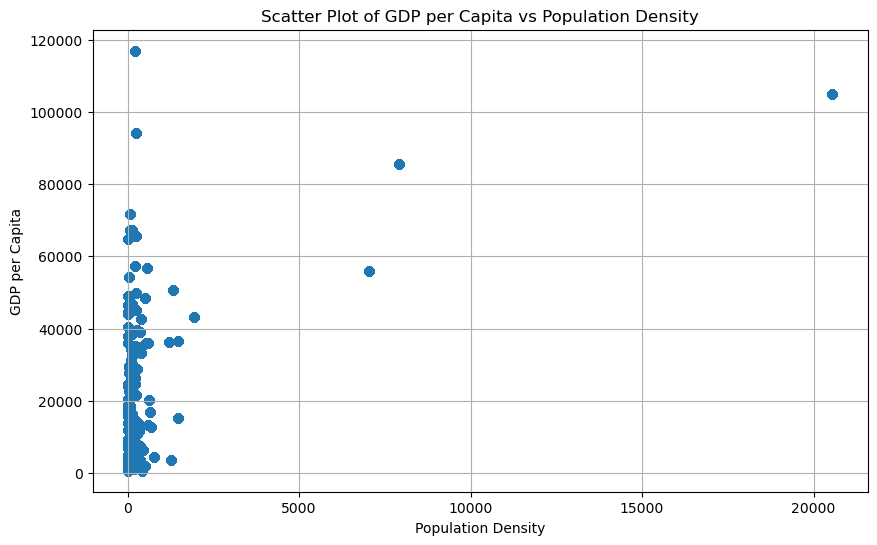

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(df['population_density'], df['gdp_per_capita'], alpha=0.7)
plt.title('Scatter Plot of GDP per Capita vs Population Density')
plt.xlabel('Population Density')
plt.ylabel('GDP per Capita')
plt.grid(True)
plt.show()